In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("colorblind")

## Group into stay and go

focused_lease: 29484 rows and 38 columns

Transaction Category Counts:
transaction_category
Go      22358
Stay     5522
TBD      1604
Name: count, dtype: int64


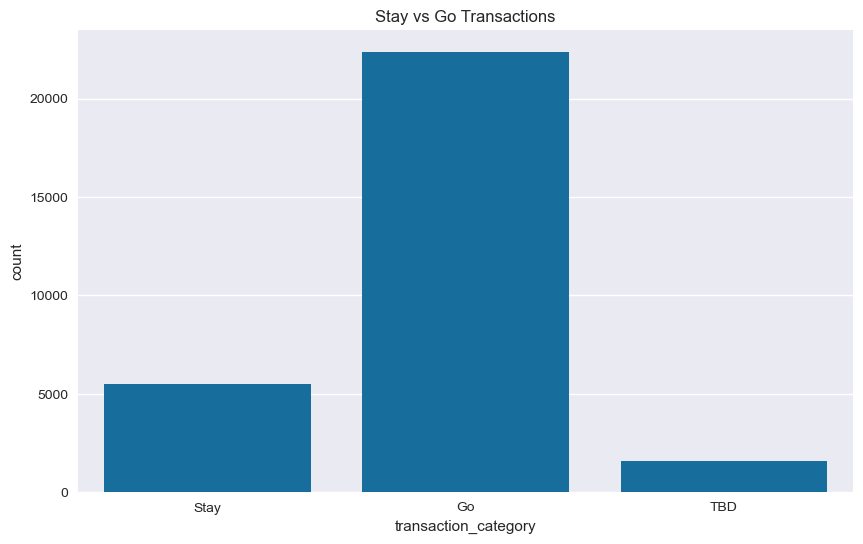

In [55]:
focused_lease = pd.read_csv('../Datasets/focused_lease.csv')

print(f"focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns")
focused_lease.head()

go_categories = ["New", "Relocation"]
stay_categories = ["Renewal", "Expansion", "Restructure", "Extension", "Renewal and Expansion"]
    
focused_lease["transaction_category"] = focused_lease["transaction_type"].apply(
    lambda x: "Go" if x in go_categories else ("Stay" if x in stay_categories else "TBD")
)
    
print("\nTransaction Category Counts:")
print(focused_lease['transaction_category'].value_counts())
    
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_category', data=focused_lease)
plt.title('Stay vs Go Transactions')
plt.show()

## Remove TBD rows

After removing TBD transactions:
focused_lease: 27880 rows and 39 columns
transaction_category
Go      22358
Stay     5522
Name: count, dtype: int64


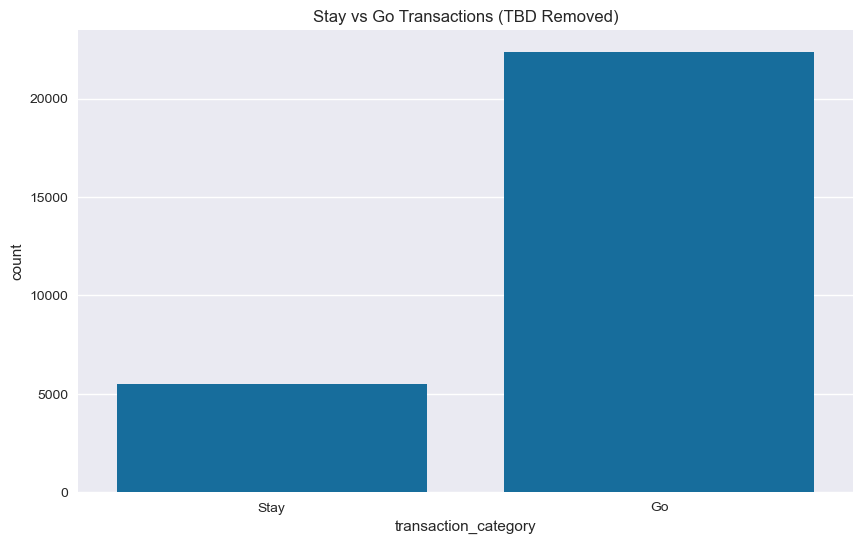

In [56]:
focused_lease = focused_lease[focused_lease['transaction_category'] != "TBD"]

print("After removing TBD transactions:")
print(f"focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns")
print(focused_lease['transaction_category'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_category', data=focused_lease)
plt.title('Stay vs Go Transactions (TBD Removed)')
plt.show()

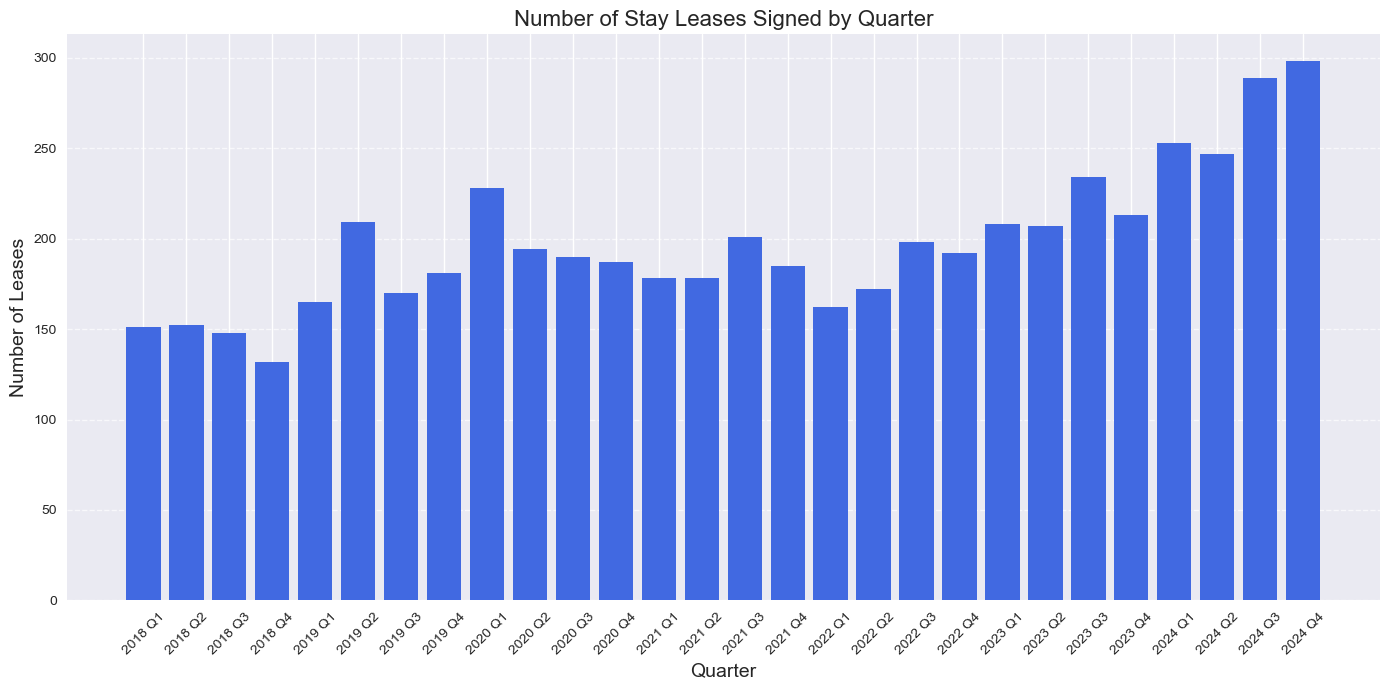

In [57]:
# Filter to only keep Stay transactions
stay_data = focused_lease[focused_lease["transaction_category"] == "Stay"].copy()

stay_data['time_period'] = stay_data['year'].astype(str) + ' ' + stay_data['quarter'].astype(str)

stay_counts = stay_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
stay_counts = stay_counts.sort_values(['year', 'quarter'])

plt.figure(figsize=(14, 7))
plt.bar(stay_counts['time_period'], stay_counts['count'], color='royalblue')
plt.title('Number of Stay Leases Signed by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# print("Stay leases by quarter:")
# print(stay_counts[['time_period', 'count']].to_string(index=False))

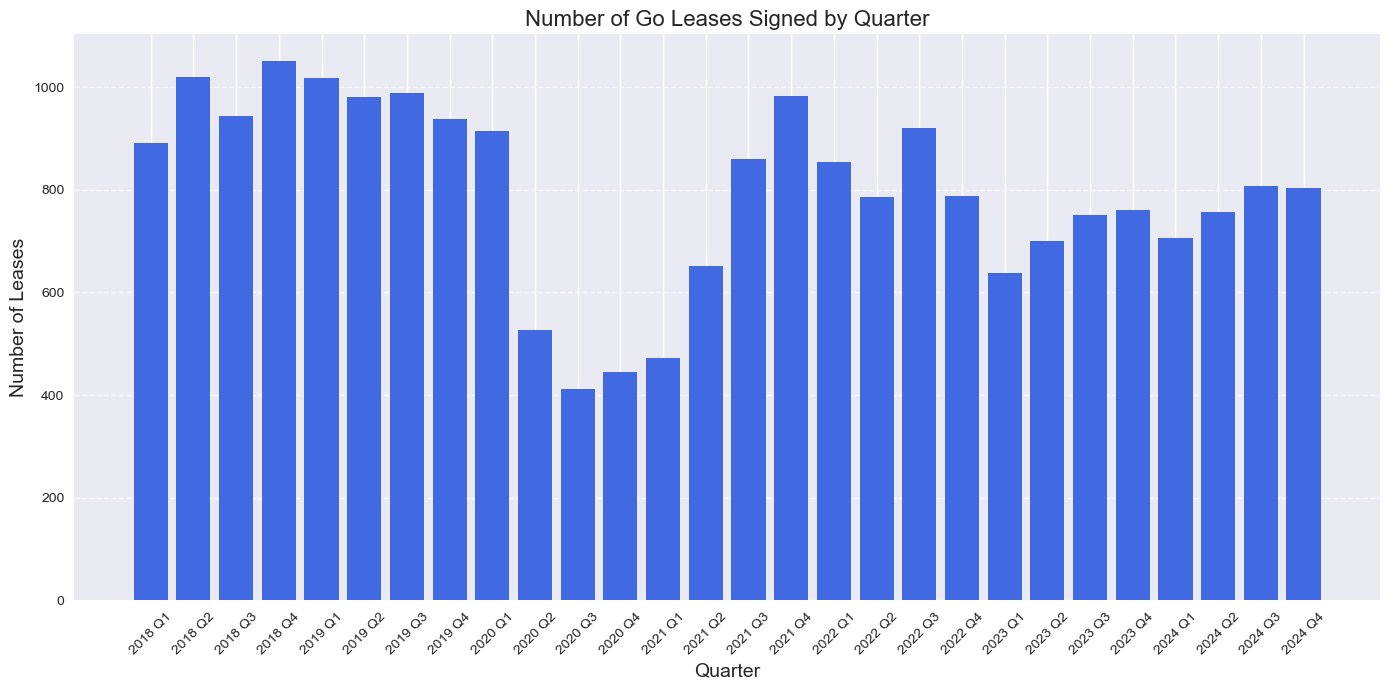

In [58]:
go_data = focused_lease[focused_lease["transaction_category"] == "Go"].copy()

go_data['time_period'] = go_data['year'].astype(str) + ' ' + go_data['quarter'].astype(str)

go_counts = go_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
go_counts = go_counts.sort_values(['year', 'quarter'])

plt.figure(figsize=(14, 7))
plt.bar(go_counts['time_period'], go_counts['count'], color='royalblue')
plt.title('Number of Go Leases Signed by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# print("Go leases by quarter:")
# print(go_counts[['time_period', 'count']].to_string(index=False))

Number of unique states: 22

Top 10 states by number of Go leases:
state
CA    4035
TX    3462
NY    2946
MA    1365
IL    1352
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

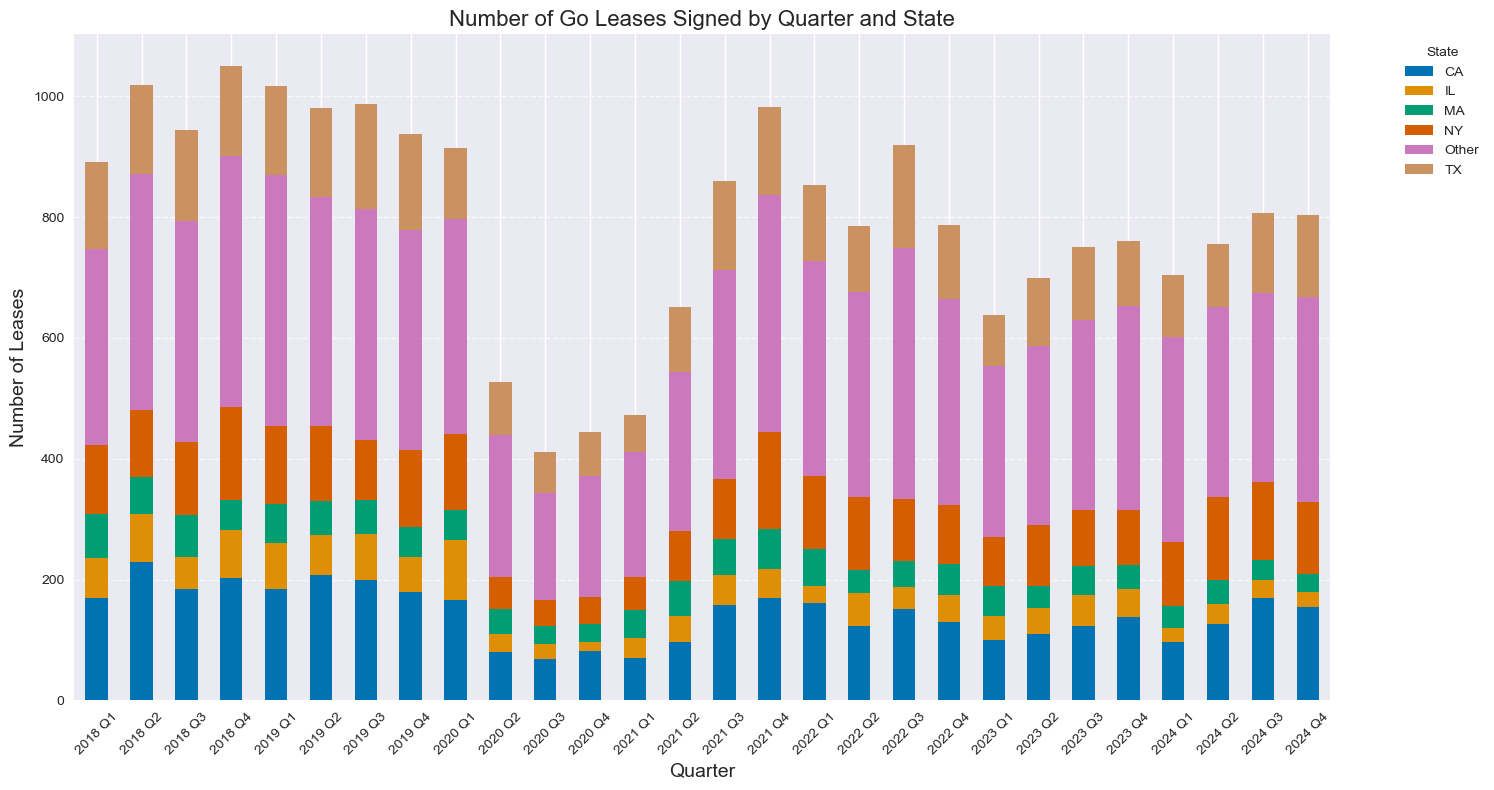

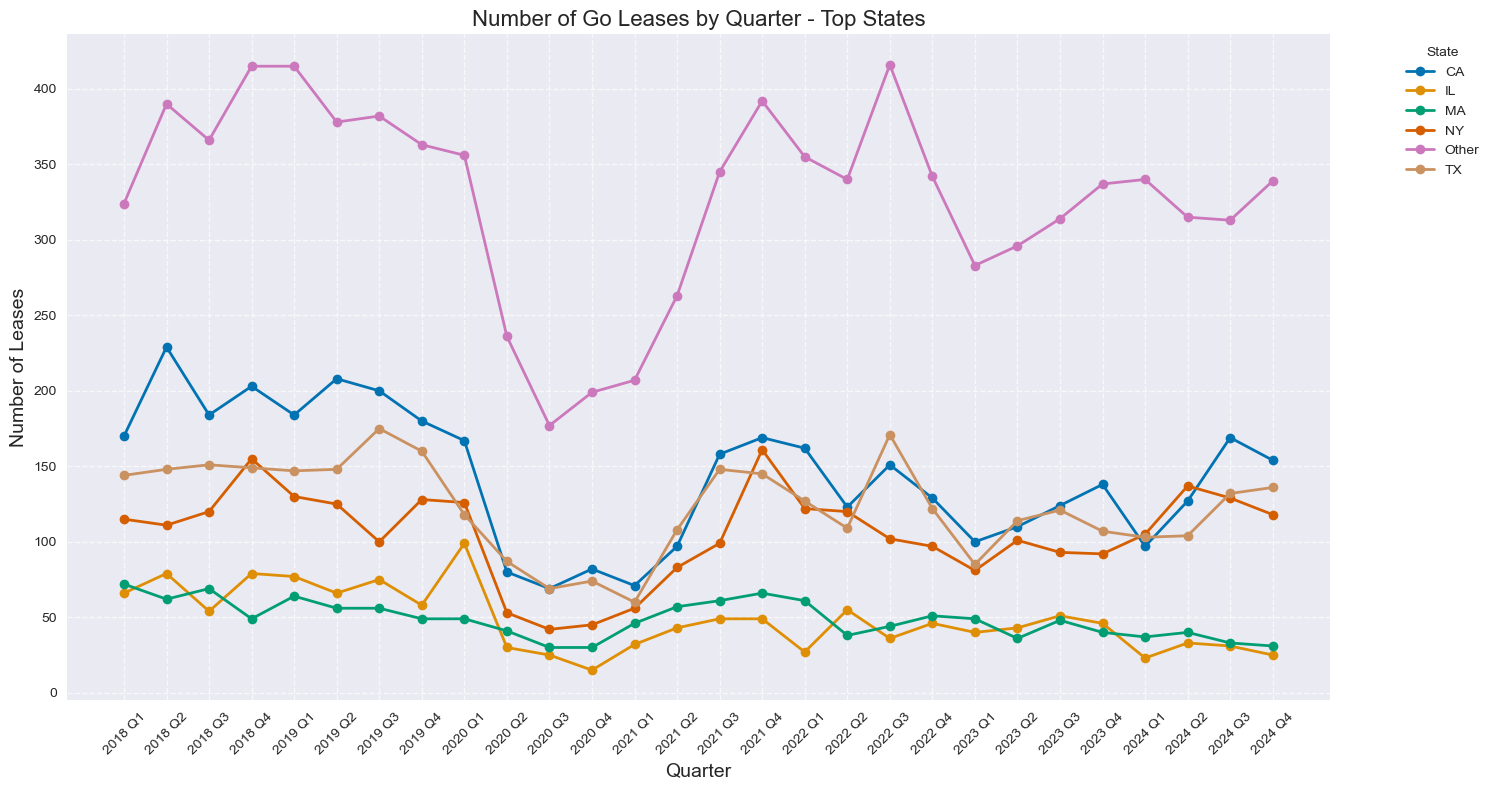

In [59]:
go_data['time_period'] = go_data['year'].astype(str) + ' ' + go_data['quarter'].astype(str)

go_counts_by_state = go_data.groupby(['year', 'quarter', 'time_period', 'state']).size().reset_index(name='count')
go_counts_by_state = go_counts_by_state.sort_values(['year', 'quarter'])

num_states = go_data['state'].nunique()
print(f"Number of unique states: {num_states}")

top_states = go_data['state'].value_counts().nlargest(5)
print("\nTop 10 states by number of Go leases:")
print(top_states)


top_state_names = top_states.index.tolist()
go_data['state_grouped'] = go_data['state'].apply(lambda x: x if x in top_state_names else 'Other')
    
go_counts_grouped = go_data.groupby(['year', 'quarter', 'time_period', 'state_grouped']).size().reset_index(name='count')
go_counts_grouped = go_counts_grouped.sort_values(['year', 'quarter'])
    
pivot_data = go_counts_grouped.pivot_table(
    index='time_period', 
    columns='state_grouped', 
    values='count', 
    aggfunc='sum'
).fillna(0)

time_periods = go_data.sort_values(['year', 'quarter'])['time_period'].unique()
pivot_data = pivot_data.reindex(time_periods)

plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Number of Go Leases Signed by Quarter and State', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for column in pivot_data.columns[:6]: 
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)
    
plt.title('Number of Go Leases by Quarter - Top States', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Number of unique states: 22

Top 10 states by number of Stay leases:
state
NY    1102
CA     716
VA     648
TX     443
DC     439
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

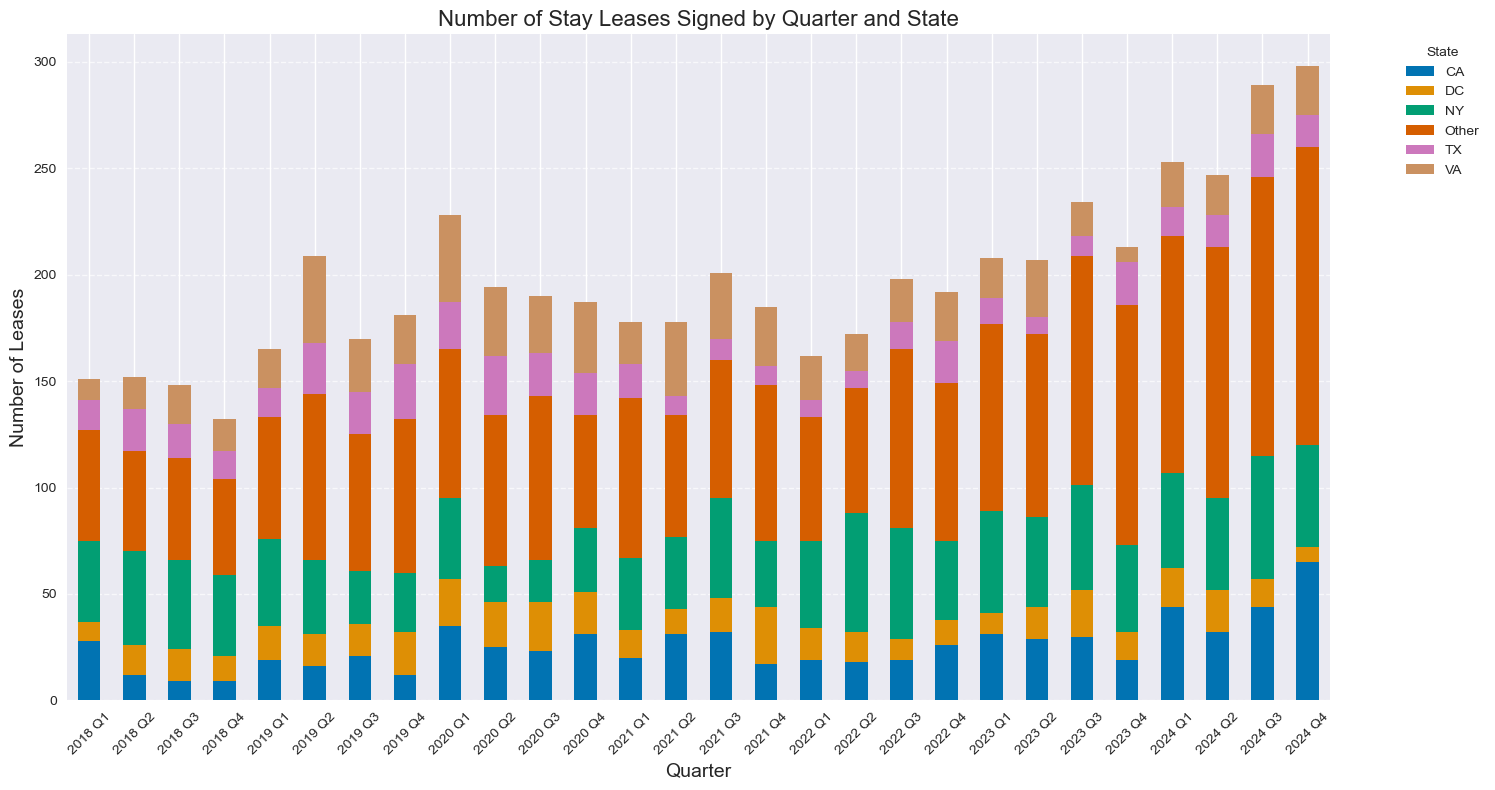

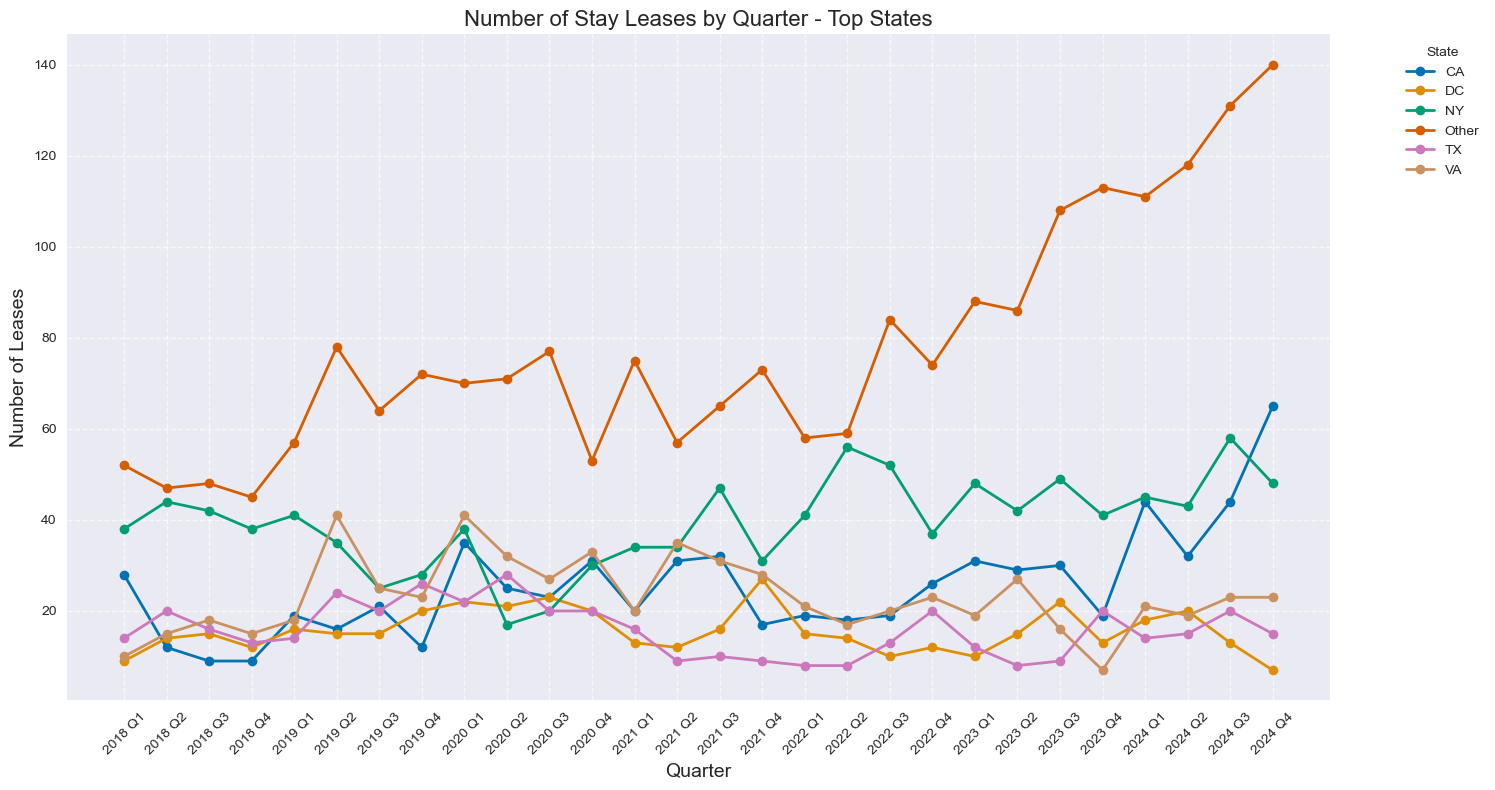

In [60]:
stay_data['time_period'] = stay_data['year'].astype(str) + ' ' + stay_data['quarter'].astype(str)

stay_counts_by_state = stay_data.groupby(['year', 'quarter', 'time_period', 'state']).size().reset_index(name='count')
stay_counts_by_state = stay_counts_by_state.sort_values(['year', 'quarter'])

num_states = stay_data['state'].nunique()
print(f"Number of unique states: {num_states}")

top_states = stay_data['state'].value_counts().nlargest(5)
print("\nTop 10 states by number of Stay leases:")
print(top_states)


top_state_names = top_states.index.tolist()
stay_data['state_grouped'] = stay_data['state'].apply(lambda x: x if x in top_state_names else 'Other')
    
stay_counts_grouped = stay_data.groupby(['year', 'quarter', 'time_period', 'state_grouped']).size().reset_index(name='count')
stay_counts_grouped = stay_counts_grouped.sort_values(['year', 'quarter'])
    
pivot_data = stay_counts_grouped.pivot_table(
    index='time_period', 
    columns='state_grouped', 
    values='count', 
    aggfunc='sum'
).fillna(0)

time_periods = stay_data.sort_values(['year', 'quarter'])['time_period'].unique()
pivot_data = pivot_data.reindex(time_periods)

plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Number of Stay Leases Signed by Quarter and State', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for column in pivot_data.columns[:6]: 
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)
    
plt.title('Number of Stay Leases by Quarter - Top States', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()